In [0]:
#Importing libraries
import torch
#library for neural network
from torch import nn
#For weight optimisation
from torch import optim
import torch.nn.functional as F
#For datasets and transformation of dataset
from torchvision import datasets,transforms

In [0]:
#For visualising the result
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [0]:
#Reading the data

#Transforming the data
transform = transforms.Compose([transforms.ToTensor(),
transforms.Normalize((0.5,), (0.5,))
])

#Reading the dataset to tensor
trainset = datasets.MNIST('~/.pytorch/MNIST_data/',download=True,train=True,transform=transform)
#loading in batch of 64
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64,shuffle=True)

In [0]:
#Creating the model
model = nn.Sequential(nn.Linear(784,128), nn.ReLU(),nn.Linear(128,64),nn.ReLU(),nn.Linear(64,10),nn.LogSoftmax(dim=1))
#Cretaing the Negative Log Loss
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr =0.003)

In [0]:
#Running the model for 5 epochs
epochs = 5
for e in range(epochs):
  running_loss = 0
  for images,labels in trainloader:
    #Reshaping the images
    images = images.view(images.shape[0],-1)
    #Setting the gradients to zero else they add up
    optimizer.zero_grad() 
    #Forward Propogation
    output = model.forward(images)
    #Calculate the loss
    loss = criterion(output,labels)
    #Backward propogate
    loss.backward()
    #Update the weights
    optimizer.step()
    #Calculate total loss
    running_loss += loss.item()
  else:
    print("Training Loss:",(running_loss/len(trainloader)))
    

Training Loss: 1.9385727271596507
Training Loss: 0.8988254869670502
Training Loss: 0.5442559086183495
Training Loss: 0.4416542255134979
Training Loss: 0.3932131126459473


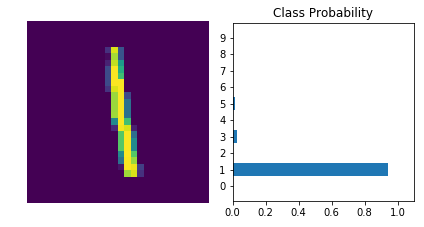

In [0]:
#Checking for the probablities
img = images[2].view(1,784)
#Setting gradients to no for faster calculation
with torch.no_grad():
  logits=model.forward(img)
#calculating the probabilities with softmax as the outputs are logits
ps = F.softmax(logits,dim=1)
view_classify(img.view(1, 28, 28), ps)